# Grafici di confronto

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
import seaborn as sns

In [25]:
MATRIX_NNZ = {
    'graham1.mtx': 335504,
    'raefsky3.mtx': 1488768,
    'ex15.mtx': 98671,
    'ex19.mtx': 259879,
    'torso1.mtx': 8516500,
    'water_tank.mtx': 2035281,
    'cfd1.mtx': 1828364,
    'PR02R.mtx': 8185136,
    'cfd2.mtx': 3087898,
    'torso3.mtx': 4429042,
    'shallow_water1.mtx': 327680,
    'parabolic_fem.mtx': 3674625,
    'apache2.mtx': 4817870,
    'G3_circuit.mtx': 7660826
}

In [3]:
matlab_ubuntu = pd.read_csv('./dati_grafici/matlab_ubuntu.csv')
matlab_windows = pd.read_csv('./dati_grafici/matlab_windows.csv')
python_ubuntu = pd.read_csv('./dati_grafici/python_ubuntu.csv')
python_windows = pd.read_csv('./dati_grafici/python_windows.csv')

In [6]:
matrix_dimension = {
    name: int(matlab_ubuntu[matlab_ubuntu['matrix'] == name]['dimensions'].iloc[0].split('x')[0])
    for name in np.unique(matlab_ubuntu['matrix'])
}
print(matrix_dimension)

{'G3_circuit.mtx': 1585478, 'PR02R.mtx': 161070, 'apache2.mtx': 715176, 'cfd1.mtx': 70656, 'cfd2.mtx': 123440, 'ex15.mtx': 6867, 'ex19.mtx': 12005, 'graham1.mtx': 9035, 'parabolic_fem.mtx': 525825, 'raefsky3.mtx': 21200, 'shallow_water1.mtx': 81920, 'torso1.mtx': 116158, 'water_tank.mtx': 60740}


# Tempi di esecuzione in funzione della dimensione delle matrici

In [28]:
matlab_ubuntu['numel'] = [int(matlab_ubuntu[matlab_ubuntu['matrix'] == name]['dimensions'].iloc[0].split('x')[0])**2 for name in matlab_ubuntu['matrix']]
matlab_windows['numel'] = [int(matlab_windows[matlab_windows['matrix'] == name]['dimensions'].iloc[0].split('x')[0])**2 for name in matlab_windows['matrix']]
python_ubuntu['numel'] = [int(python_ubuntu[python_ubuntu['matrix'] == name]['dimensions'].iloc[0].split('x')[0])**2 for name in python_ubuntu['matrix']]
python_windows['numel'] = [int(python_windows[python_windows['matrix'] == name]['dimensions'].iloc[0].split('x')[0])**2 for name in python_windows['matrix']]

matlab_ubuntu['nnz'] = [MATRIX_NNZ[name] for name in matlab_ubuntu['matrix']]
matlab_windows['nnz'] = [MATRIX_NNZ[name] for name in matlab_windows['matrix']]
python_ubuntu['nnz'] = [MATRIX_NNZ[name] for name in python_ubuntu['matrix']]
python_windows['nnz'] = [MATRIX_NNZ[name] for name in python_windows['matrix']]

matlab_ubuntu['dim'] = np.sqrt(matlab_ubuntu['numel'])
matlab_windows['dim'] = np.sqrt(matlab_windows['numel'])
python_ubuntu['dim'] = np.sqrt(python_ubuntu['numel'])
python_windows['dim'] = np.sqrt(python_windows['numel'])

In [29]:
matlab_ubuntu

,Unnamed: 0,matrix,dimensions,type,iter,times_mean,times_var,rel_error,system,memory,numel,nnz,dim
0,0,G3_circuit.mtx,1585478x1585478,def_pos,30,17.353220,2.555859,3.148345e+11,Ubuntu,111560.0,2513740488484,7660826,1585478.0
1,1,apache2.mtx,715176x715176,def_pos,30,15.465220,1.088567,2.295513e+10,Ubuntu,88484.0,511476710976,4817870,715176.0
2,2,cfd1.mtx,70656x70656,def_pos,30,2.420054,0.156661,8.325249e+12,Ubuntu,27044.0,4992270336,1828364,70656.0
3,3,cfd2.mtx,123440x123440,def_pos,30,6.068183,0.403202,1.677853e+12,Ubuntu,3308.0,15237433600,3087898,123440.0
4,4,ex15.mtx,6867x6867,def_pos,30,0.020344,0.000023,8.823901e+05,Ubuntu,0.0,47155689,98671,6867.0
5,5,parabolic_fem.mtx,525825x525825,def_pos,30,3.266709,0.291619,8.050382e+11,Ubuntu,80588.0,276491930625,3674625,525825.0
6,6,shallow_water1.mtx,81920x81920,def_pos,30,0.354617,0.001524,2.986149e+15,Ubuntu,0.0,6710886400,327680,81920.0
7,7,PR02R.mtx,161070x161070,non_def_pos,30,24.862350,3.183128,3.948246e+06,Ubuntu,68644.0,25943544900,8185136,161070.0
8,8,ex19.mtx,12005x12005,non_def_pos,30,0.105742,0.000063,2.955501e+07,Ubuntu,344.0,144120025,259879,12005.0
9,9,graham1.mtx,9035x9035,non_def_pos,30,0.333267,0.001164,8.041572e+09,Ubuntu,15188.0,81631225,335504,9035.0


In [30]:
matlab_windows

,Unnamed: 0,matrix,dimensions,type,iter,times_mean,times_var,rel_error,system,memory,numel,nnz,dim
0,0,G3_circuit.mtx,1585478x1585478,def_pos,30,18.210580,1.963873,3.148345e+11,Windows,69736.0,2513740488484,7660826,1585478.0
1,1,apache2.mtx,715176x715176,def_pos,30,16.171340,0.866789,2.295513e+10,Windows,12356.0,511476710976,4817870,715176.0
2,2,cfd1.mtx,70656x70656,def_pos,30,2.625041,0.222782,8.325249e+12,Windows,14756.0,4992270336,1828364,70656.0
3,3,cfd2.mtx,123440x123440,def_pos,30,6.410763,0.257381,1.677853e+12,Windows,9708.0,15237433600,3087898,123440.0
4,4,ex15.mtx,6867x6867,def_pos,30,0.034237,0.000007,8.823901e+05,Windows,0.0,47155689,98671,6867.0
5,5,parabolic_fem.mtx,525825x525825,def_pos,30,3.182598,0.003661,8.050382e+11,Windows,9708.0,276491930625,3674625,525825.0
6,6,shallow_water1.mtx,81920x81920,def_pos,30,0.349861,0.000194,2.986149e+15,Windows,7380.0,6710886400,327680,81920.0
7,7,PR02R.mtx,161070x161070,non_def_pos,30,24.229360,0.999057,3.948246e+06,Windows,106156.0,25943544900,8185136,161070.0
8,8,ex19.mtx,12005x12005,non_def_pos,30,0.119915,0.000079,2.955501e+07,Windows,15460.0,144120025,259879,12005.0
9,9,graham1.mtx,9035x9035,non_def_pos,30,0.383627,0.000151,8.041572e+09,Windows,12724.0,81631225,335504,9035.0


In [31]:
python_ubuntu

,Unnamed: 0,matrix,dimensions,type,iter,times_mean,times_var,rel_error,system,memory,numel,nnz,dim
0,0,G3_circuit.mtx,1585478x1585478,def_pos,30,43.445280,0.678834,1.694270e-12,Ubuntu,2.160648e+06,2513740488484,7660826,1585478.0
1,1,PR02R.mtx,161070x161070,non_def_pos,30,71.187560,0.025060,7.159778e+11,Ubuntu,1.414682e+06,25943544900,8185136,161070.0
2,2,apache2.mtx,715176x715176,def_pos,30,43.336114,0.115700,1.244596e-11,Ubuntu,2.264351e+06,511476710976,4817870,715176.0
3,3,cfd1.mtx,70656x70656,def_pos,30,5.731424,0.000765,7.351572e-14,Ubuntu,2.118625e+06,4992270336,1828364,70656.0
4,4,cfd2.mtx,123440x123440,def_pos,30,10.260247,0.003391,2.988965e-13,Ubuntu,4.850027e+05,15237433600,3087898,123440.0
5,5,ex15.mtx,6867x6867,def_pos,30,0.167575,0.000496,5.841560e-07,Ubuntu,2.659145e+05,47155689,98671,6867.0
6,6,ex19.mtx,12005x12005,non_def_pos,30,0.429680,0.000081,1.333124e-08,Ubuntu,1.211127e+06,144120025,259879,12005.0
7,7,graham1.mtx,9035x9035,non_def_pos,30,0.481756,0.000056,5.299469e-02,Ubuntu,0.000000e+00,81631225,335504,9035.0
8,8,parabolic_fem.mtx,525825x525825,def_pos,30,12.061524,0.000327,4.459792e-12,Ubuntu,4.057740e+05,276491930625,3674625,525825.0
9,9,raefsky3.mtx,21200x21200,non_def_pos,30,0.770358,0.000071,4.089091e-12,Ubuntu,0.000000e+00,449440000,1488768,21200.0


In [32]:
python_windows

,Unnamed: 0,matrix,dimensions,type,iter,times_mean,times_var,rel_error,system,memory,numel,nnz,dim
0,0,G3_circuit.mtx,1585478x1585478,def_pos,30,17.043550,0.720344,1.712802e-12,Windows,2.505682e+06,2513740488484,7660826,1585478.0
1,1,PR02R.mtx,161070x161070,non_def_pos,30,26.163846,0.198422,5.647428e+10,Windows,1.656280e+06,25943544900,8185136,161070.0
2,2,apache2.mtx,715176x715176,def_pos,30,20.411076,0.831882,1.294663e-11,Windows,2.638292e+06,511476710976,4817870,715176.0
3,3,cfd1.mtx,70656x70656,def_pos,30,2.528764,0.074961,8.867175e-14,Windows,2.516521e+06,4992270336,1828364,70656.0
4,4,cfd2.mtx,123440x123440,def_pos,30,4.151687,0.152891,2.416354e-13,Windows,7.271493e+05,15237433600,3087898,123440.0
5,5,ex15.mtx,6867x6867,def_pos,30,0.135720,0.001154,7.130587e-07,Windows,5.552732e+05,47155689,98671,6867.0
6,6,ex19.mtx,12005x12005,non_def_pos,30,0.288601,0.000856,1.359439e-08,Windows,1.600964e+06,144120025,259879,12005.0
7,7,graham1.mtx,9035x9035,non_def_pos,30,0.187720,0.000592,8.014328e-03,Windows,1.361000e+04,81631225,335504,9035.0
8,8,parabolic_fem.mtx,525825x525825,def_pos,30,4.348768,0.180455,4.529659e-12,Windows,6.932009e+05,276491930625,3674625,525825.0
9,9,raefsky3.mtx,21200x21200,non_def_pos,30,0.322401,0.000882,5.697257e-12,Windows,1.006929e+05,449440000,1488768,21200.0


## Matrici simmetriche definite positive

In [55]:
matlab_ubuntu_sdf = matlab_ubuntu[matlab_ubuntu['type'] == 'def_pos']
matlab_windows_sdf = matlab_windows[matlab_windows['type'] == 'def_pos']
python_ubuntu_sdf = python_ubuntu[python_ubuntu['type'] == 'def_pos']
python_windows_sdf = python_windows[python_windows['type'] == 'def_pos']

matlab_ubuntu_unsym = matlab_ubuntu[matlab_ubuntu['type'] == 'non_def_pos']
matlab_windows_unsym = matlab_windows[matlab_windows['type'] == 'non_def_pos']
python_ubuntu_unsym = python_ubuntu[python_ubuntu['type'] == 'non_def_pos']
python_windows_unsym = python_windows[python_windows['type'] == 'non_def_pos']

In [58]:
matlab_ubuntu_unsym

,Unnamed: 0,matrix,dimensions,type,iter,times_mean,times_var,rel_error,system,memory,numel,nnz,dim
7,7,PR02R.mtx,161070x161070,non_def_pos,30,24.862350,3.183128,3.948246e+06,Ubuntu,68644.0,25943544900,8185136,161070.0
8,8,ex19.mtx,12005x12005,non_def_pos,30,0.105742,0.000063,2.955501e+07,Ubuntu,344.0,144120025,259879,12005.0
9,9,graham1.mtx,9035x9035,non_def_pos,30,0.333267,0.001164,8.041572e+09,Ubuntu,15188.0,81631225,335504,9035.0
10,10,raefsky3.mtx,21200x21200,non_def_pos,30,0.814763,0.010453,2.116176e+13,Ubuntu,66276.0,449440000,1488768,21200.0
11,11,torso1.mtx,116158x116158,non_def_pos,30,24.731190,1.681731,2.576923e+05,Ubuntu,1700.0,13492680964,8516500,116158.0
12,12,water_tank.mtx,60740x60740,non_def_pos,30,47.227970,3.786235,1.130331e+11,Ubuntu,90020.0,3689347600,2035281,60740.0


In [60]:
python_ubuntu_unsym_no_torso3 = python_ubuntu_unsym.drop(12)
python_ubuntu_unsym_no_torso3

,Unnamed: 0,matrix,dimensions,type,iter,times_mean,times_var,rel_error,system,memory,numel,nnz,dim
1,1,PR02R.mtx,161070x161070,non_def_pos,30,71.187560,0.025060,7.159778e+11,Ubuntu,1.414682e+06,25943544900,8185136,161070.0
6,6,ex19.mtx,12005x12005,non_def_pos,30,0.429680,0.000081,1.333124e-08,Ubuntu,1.211127e+06,144120025,259879,12005.0
7,7,graham1.mtx,9035x9035,non_def_pos,30,0.481756,0.000056,5.299469e-02,Ubuntu,0.000000e+00,81631225,335504,9035.0
9,9,raefsky3.mtx,21200x21200,non_def_pos,30,0.770358,0.000071,4.089091e-12,Ubuntu,0.000000e+00,449440000,1488768,21200.0
11,11,torso1.mtx,116158x116158,non_def_pos,30,33.650925,0.009064,9.902802e-01,Ubuntu,4.348295e+05,13492680964,8516500,116158.0
13,13,water_tank.mtx,60740x60740,non_def_pos,30,6.295671,0.000798,3.590060e-10,Ubuntu,1.660283e+06,3689347600,2035281,60740.0


In [61]:
def plot_times(df_matlab, df_python, o_s):
    sns.set_context('talk')
    fig, ax = pl.subplots(nrows=1, ncols=1, figsize=(14, 10))
    ordered_matlab = df_matlab.sort_values(by='dim')
#    print(ordered_matlab)
    ordered_python = df_python.sort_values(by='dim')
#    print(ordered_python)
    
    sq_py = 1.96 * np.sqrt(ordered_python['times_var'] / 30)
    mean_py = ordered_python['times_mean']
    sq_mat = 1.96 * np.sqrt(ordered_matlab['times_var'] / 30)
    mean_mat = ordered_matlab['times_mean']
    
    x = ordered_matlab['matrix']
    # Matlab
    ax.plot(x, mean_mat, marker='o', color='coral', label='Matlab')
    ax.fill_between(x, mean_mat - sq_mat, mean_mat + sq_mat, label='IC(Matlab)', color='mistyrose')

    # Python
    ax.plot(x, mean_py, marker='o', color='dodgerblue', label='Python')
    ax.fill_between(x, mean_py - sq_py, mean_py + sq_py, label='IC(Python)', color='paleturquoise')
    
    ax.legend()
    pl.title('Tempi di esecuzione su ' + o_s)
    sns.despine()

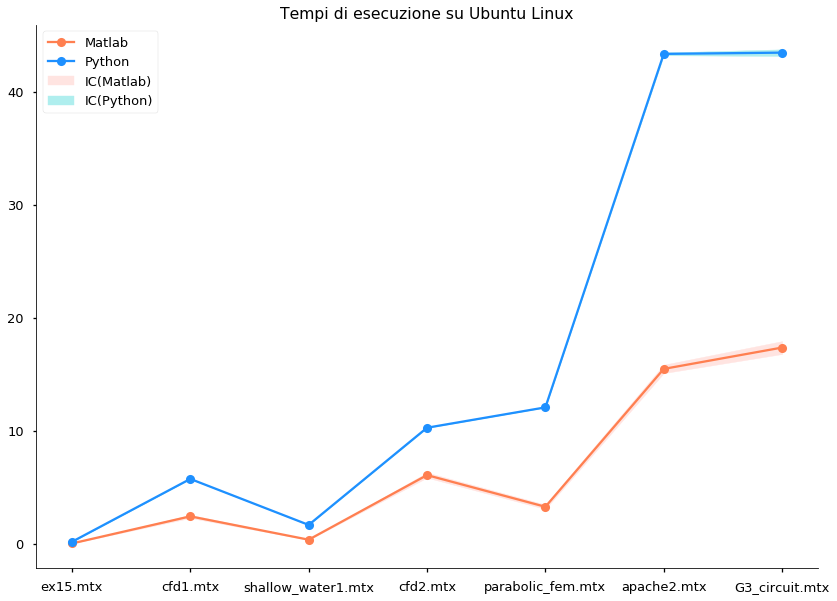

In [62]:
plot_times(matlab_ubuntu_sdf, python_ubuntu_sdf, 'Ubuntu Linux')

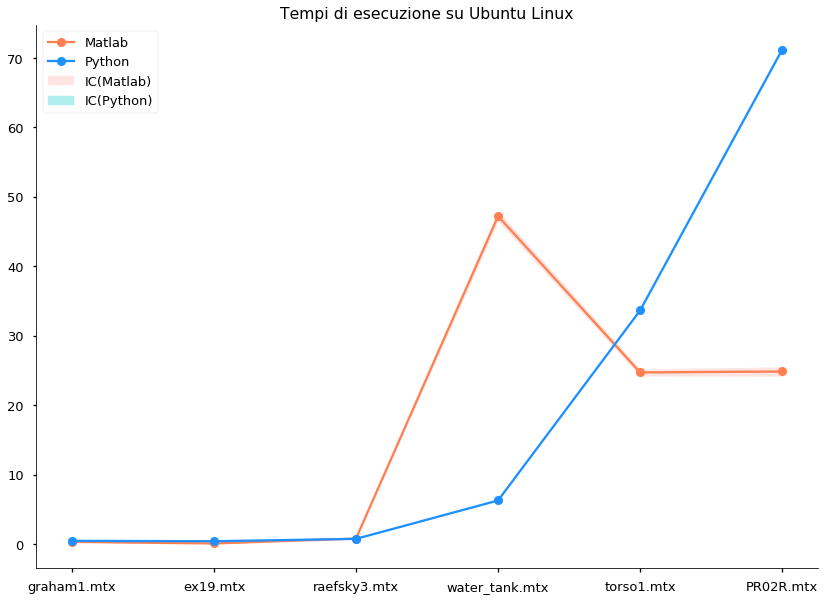

In [64]:
plot_times(matlab_ubuntu_unsym, python_ubuntu_unsym_no_torso3, 'Ubuntu Linux')